<a href="https://colab.research.google.com/github/bttrung/CVND-udacity-facebook-scholarship/blob/master/images-processing/6_Average_Brightness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 # computer vision library

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os

%matplotlib inline


In [0]:
# This function loads in images and their labels and places them in a list
# The list contains all images and their associated labels
# For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list
def load_dataset(image_dir):
    
    # Populate this empty image list
    im_list = []
    image_types = ["day", "night"]
    
    # Iterate through each color folder
    for im_type in image_types:
        
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            # Read in the image
            im = mpimg.imread(file)
            
            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))
    
    return im_list

In [3]:
# Clone the entire repo.
!git clone -l -s https://github.com/bttrung/CVND-udacity-facebook-scholarship.git
%cd cloned-repo
!ls

Cloning into 'CVND-udacity-facebook-scholarship'...
remote: Enumerating objects: 481, done.
remote: Counting objects: 100% (481/481), done.
remote: Compressing objects: 100% (478/478), done.
remote: Total 481 (delta 22), reused 408 (delta 1), pack-reused 0
Receiving objects: 100% (481/481), 30.14 MiB | 26.63 MiB/s, done.
Resolving deltas: 100% (22/22), done.
[Errno 2] No such file or directory: 'cloned-repo'
/content
CVND-udacity-facebook-scholarship  sample_data


In [0]:
training_dir = 'CVND-udacity-facebook-scholarship/images-processing/day_night_images/training'
test_dir = 'CVND-udacity-facebook-scholarship/images-processing/day_night_images/test'

In [0]:
IMAGE_LIST = load_dataset("CVND-udacity-facebook-scholarship/images-processing/day_night_images/training")

In [0]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image so that all "standard" images are the same size 600x1100 (hxw) 
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im

In [0]:
# Examples: 
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
        
    numerical_val = 0
    if label == 'day':
        numerical_val = 1
    
    ## TODO: complete the code to produce a numerical label
    
    return numerical_val

In [0]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Create a numerical label
        binary_label = encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


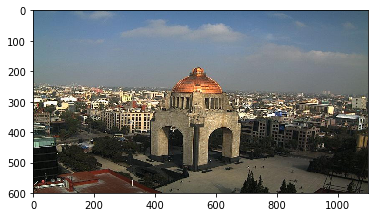

In [9]:
# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
## TODO: Make sure the images have numerical labels and are of the same size
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

## Feature Extraction

Label: 1


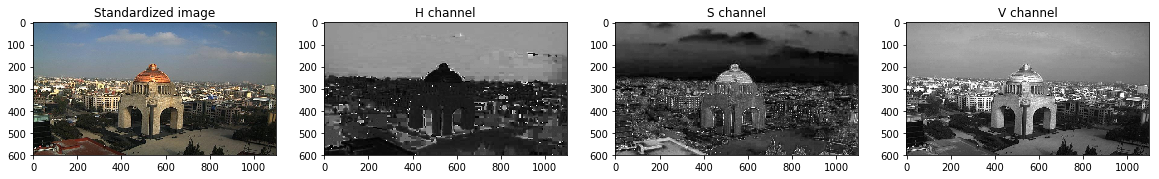

In [10]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [0]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    
    ## TODO: Calculate the average brightness using the area of the image
    # and the sum calculated above
    area = 600 * 1100
    avg = sum_brightness / area
    
    return avg

Avg brightness: 26.971457575757576


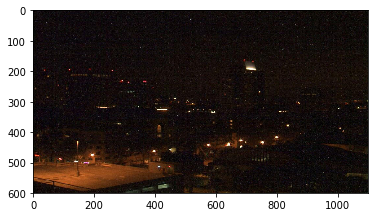

In [12]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

Avg brightness: 114.34179848484848


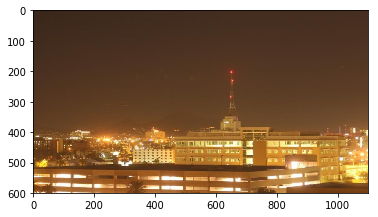

In [13]:
image_num = 192
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

Avg brightness: 197.48356515151517


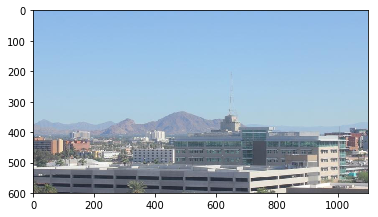

In [17]:
image_num = 97
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

Avg brightness: 163.87239393939393


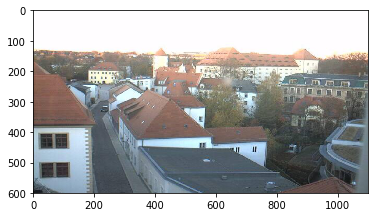

In [18]:
image_num = 99
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)